In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import RobustScaler,LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importacion de los datos
train = pd.read_csv("data.csv")
train = train.drop(['url','course_id','course_title','is_paid'],axis=1)
train.head()

,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [4]:
train.describe()

,price,num_subscribers,num_reviews,num_lectures,profit,year,month,day
count,3683.000000,3683.000000,3683.000000,3683.000000,3.683000e+03,3683.000000,3683.000000,3683.000000
mean,65.992398,3193.371165,156.448004,40.062178,2.402885e+05,2015.433342,6.162639,15.841162
std,60.985586,9498.231406,935.078241,50.366788,1.000760e+06,1.185920,3.379314,8.780906
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2011.000000,1.000000,1.000000
25%,20.000000,110.000000,4.000000,15.000000,1.567500e+03,2015.000000,3.000000,8.000000
50%,45.000000,911.000000,18.000000,25.000000,2.305000e+04,2016.000000,6.000000,16.000000
75%,95.000000,2537.500000,67.000000,45.000000,1.182600e+05,2016.000000,9.000000,23.000000
max,200.000000,268923.000000,27445.000000,779.000000,2.431680e+07,2017.000000,12.000000,31.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                3683 non-null   int64 
 1   num_subscribers      3683 non-null   int64 
 2   num_reviews          3683 non-null   int64 
 3   num_lectures         3683 non-null   int64 
 4   level                3683 non-null   object
 5   content_duration     3683 non-null   object
 6   published_timestamp  3683 non-null   object
 7   subject              3683 non-null   object
 8   profit               3683 non-null   int64 
 9   published_date       3683 non-null   object
 10  published_time       3682 non-null   object
 11  year                 3683 non-null   int64 
 12  month                3683 non-null   int64 
 13  day                  3683 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 403.0+ KB


In [6]:
train.isnull().sum()

price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
profit                 0
published_date         0
published_time         1
year                   0
month                  0
day                    0
dtype: int64

Antes de la exploracion de datos voy a convertir variables categoricas a numericas
Hago un foreach para cada columna, si tiene valores faltantes lo corrige y despues aplica el labelencoder

In [7]:

cols = ['content_duration','level', 'published_timestamp', 'subject', 'published_date', 'published_time']
for col in cols:
    train[col] = train[col].fillna('missing')
    train[col] = LabelEncoder().fit_transform(train[col])

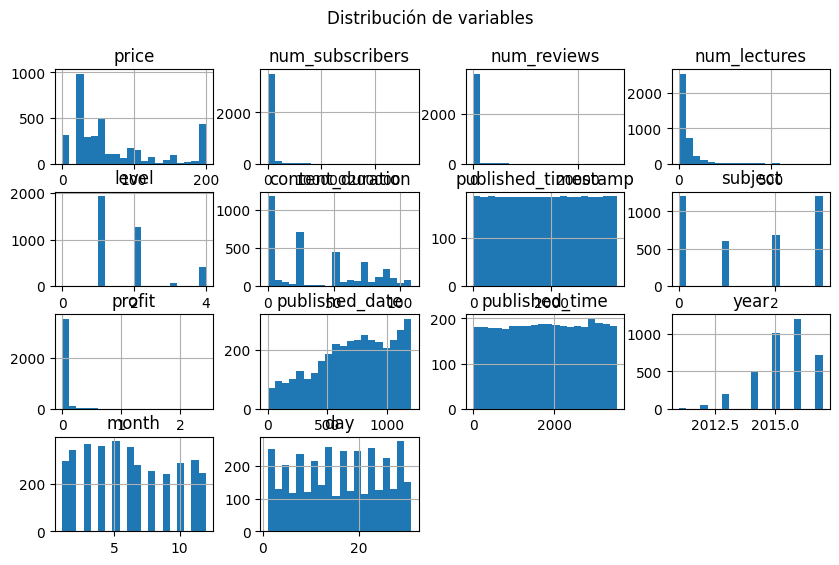

In [8]:
#Exploracion de datos
train.hist(figsize=(10,6), bins=20)
plt.suptitle("Distribución de variables")
plt.show()

Aparentemente requeriria escalado Robusto

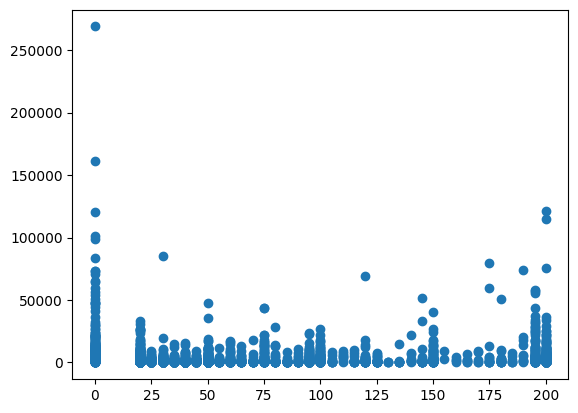

In [9]:
plt.scatter(data=train,x='price',y='num_subscribers')

In [10]:
#Escalamos
scaler = RobustScaler()
Xtrain = scaler.fit_transform(train)

In [11]:
#Aplicamos PCA
pca_full = PCA(n_components=None, svd_solver='full')
pca_full.fit(Xtrain)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)
for thresh in [0.90, 0.95]:
    k = np.searchsorted(cum_explained, thresh) + 1
    print(f"N° componentes para explicar ≥ {int(thresh*100)}%: {k}")

N° componentes para explicar ≥ 90%: 2
N° componentes para explicar ≥ 95%: 3


Text(0, 0.5, 'Varianza explicada')

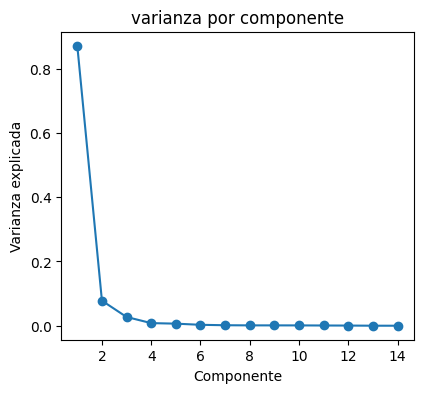

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title('varianza por componente')
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')


In [13]:
pca = PCA(n_components=3)
ntrain = pca.fit_transform(Xtrain)

In [ ]:
#Sistema de Recomendacion
similarity_matrix = cosine_similarity(ntrain)
similarity_matrix

array([[ 1.        , -0.71719936,  0.18571927, ..., -0.48447129,
         0.19889413,  0.19440602],
       [-0.71719936,  1.        , -0.69031795, ...,  0.08750029,
        -0.64891578, -0.71732211],
       [ 0.18571927, -0.69031795,  1.        , ...,  0.66030656,
         0.99351177,  0.99839707],
       ...,
       [-0.48447129,  0.08750029,  0.66030656, ...,  1.        ,
         0.69512928,  0.62975392],
       [ 0.19889413, -0.64891578,  0.99351177, ...,  0.69512928,
         1.        ,  0.98575358],
       [ 0.19440602, -0.71732211,  0.99839707, ...,  0.62975392,
         0.98575358,  1.        ]], shape=(3683, 3683))